# Proyecto Mineria de Datos

Importar librerias básicas para el funcionamiento del proyecto:
    

In [246]:
import pandas as pd # para obtener la informacion del archivo csv
import matplotlib.pyplot as plt

%matplotlib inline

Leer archivo con informacion para la generación del dataset:

In [247]:
cervicalCancer = pd.read_csv("kag_risk_factors_cervical_cancer.csv")
cervicalCancer

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.000000,0.00,0.0,0.00,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.000000,0.00,0.0,0.00,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
2,34,1.0,NaN,1.0,0.0,0.000000,0.00,0.0,0.00,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.000000,37.00,1.0,3.00,0.0,...,NaN,NaN,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.000000,0.00,1.0,15.00,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
5,42,3.0,23.0,2.0,0.0,0.000000,0.00,0.0,0.00,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
6,51,3.0,17.0,6.0,1.0,34.000000,3.40,0.0,0.00,1.0,...,NaN,NaN,0,0,0,0,1,1,0,1
7,26,1.0,26.0,3.0,0.0,0.000000,0.00,1.0,2.00,1.0,...,NaN,NaN,0,0,0,0,0,0,0,0
8,45,1.0,20.0,5.0,0.0,0.000000,0.00,0.0,0.00,0.0,...,NaN,NaN,1,0,1,1,0,0,0,0
9,44,3.0,15.0,NaN,1.0,1.266973,2.80,0.0,0.00,NaN,...,NaN,NaN,0,0,0,0,0,0,0,0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12b04b9b0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x12c79ef98>]], dtype=object)

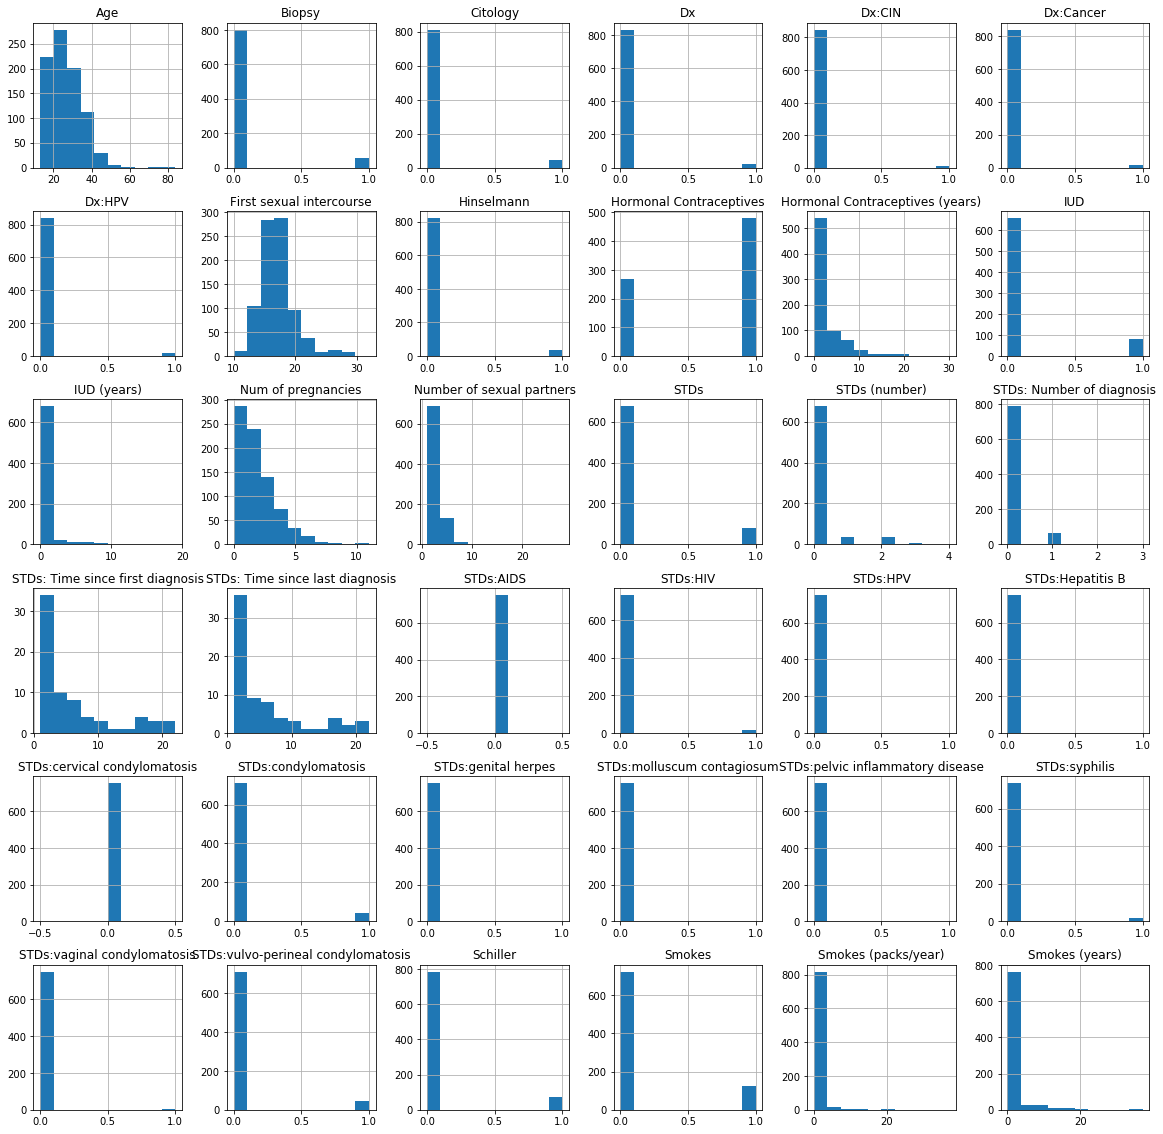

In [248]:
cervicalCancer.hist(figsize=(20,20))

## Preprocesamiento de los Datos

Para el pre-procesamiento inicial de los datos, se proceden a eliminar los siguientes valores:
* Las fechas de padecimiento de STDs: Por falta de información en estos dos atributos, se eliminan.
* STDs (cervical condylomatosis, molluscum contagiosum, pelvic inflammatory disease, vaginal condylomatosis, genital herpes, Hepatitis B, AIDS, HPV)
    * Se eliminan todas las columnas relacionadas a las enfermedades anteriores, pues de acuerdo al dataset, ninguna de las pacientes padeció estas enfermedades, lo que no da valor a nuestro estudio.

In [249]:
cervicalCancer.drop(['STDs:cervical condylomatosis','STDs:molluscum contagiosum','STDs:pelvic inflammatory disease','STDs:vaginal condylomatosis','STDs:genital herpes','STDs:Hepatitis B','STDs:AIDS','STDs:HPV','STDs: Time since first diagnosis', 'STDs: Time since last diagnosis'], axis=1, inplace=True)

Para los valores faltantes(NaN) se procede a usar la función **fillna** de pandas, bajo el siguiente método:
* bff: usa la siguiente observación valida para llenar el valor faltante.

In [250]:
cervicalCancer.fillna(method='bfill',inplace=True)

In [251]:
cervicalCancer

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs:HIV,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.000000,0.00,0.0,0.00,0.0,...,0.0,0,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.000000,0.00,0.0,0.00,0.0,...,0.0,0,0,0,0,0,0,0,0,0
2,34,1.0,16.0,1.0,0.0,0.000000,0.00,0.0,0.00,0.0,...,0.0,0,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.000000,37.00,1.0,3.00,0.0,...,0.0,0,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.000000,0.00,1.0,15.00,0.0,...,0.0,0,0,0,0,0,0,0,0,0
5,42,3.0,23.0,2.0,0.0,0.000000,0.00,0.0,0.00,0.0,...,0.0,0,0,0,0,0,0,0,0,0
6,51,3.0,17.0,6.0,1.0,34.000000,3.40,0.0,0.00,1.0,...,0.0,0,0,0,0,0,1,1,0,1
7,26,1.0,26.0,3.0,0.0,0.000000,0.00,1.0,2.00,1.0,...,0.0,0,0,0,0,0,0,0,0,0
8,45,1.0,20.0,5.0,0.0,0.000000,0.00,0.0,0.00,0.0,...,0.0,0,1,0,1,1,0,0,0,0
9,44,3.0,15.0,4.0,1.0,1.266973,2.80,0.0,0.00,0.0,...,0.0,0,0,0,0,0,0,0,0,0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12ce95ba8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x12e31b3c8>]], dtype=object)

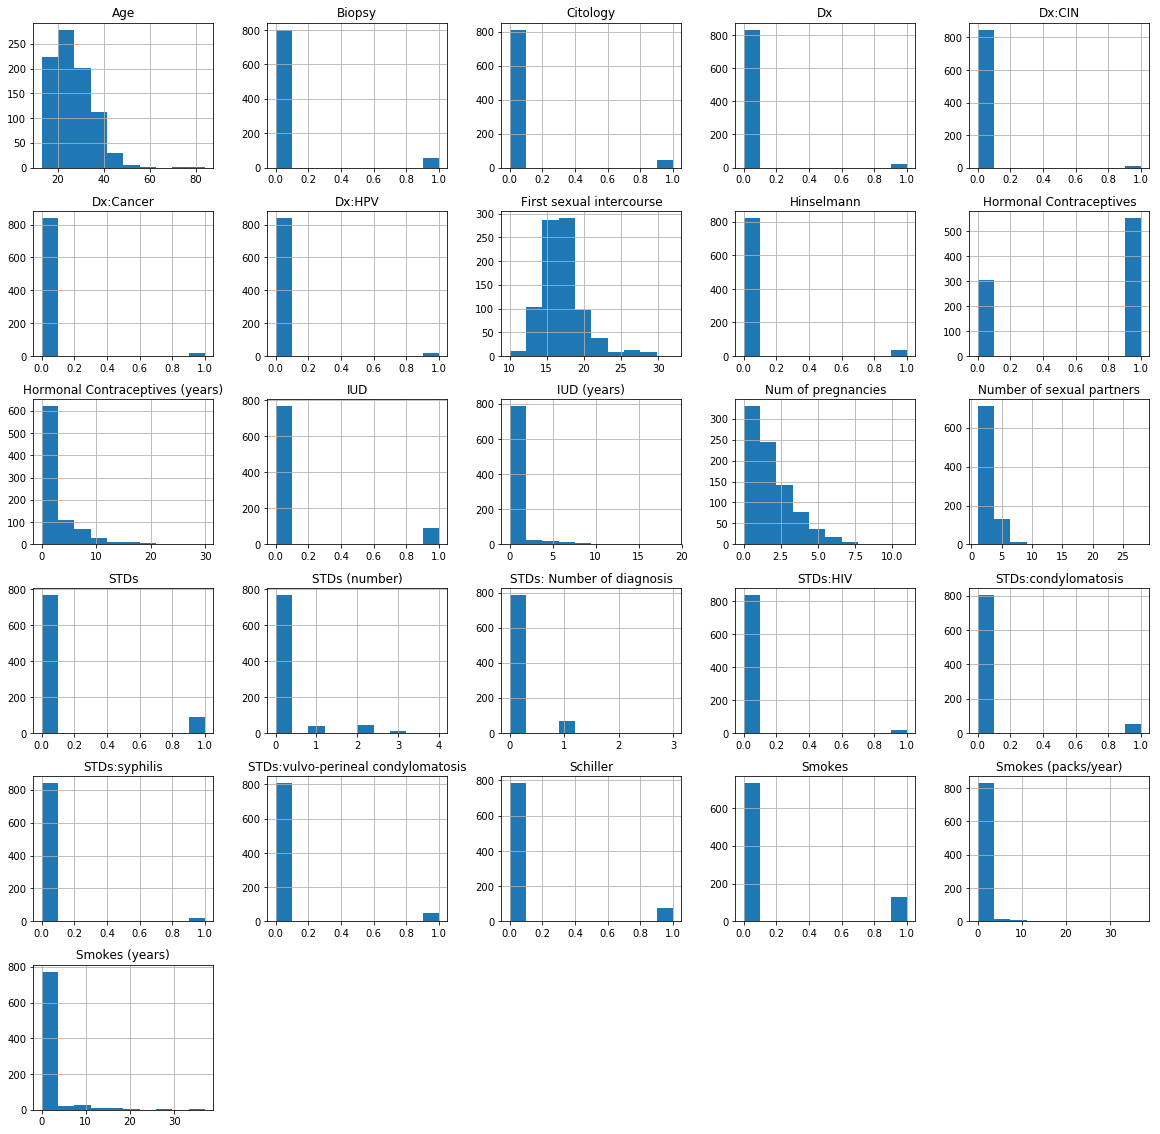

In [252]:
cervicalCancer.hist(figsize=(20,20))

Confirmemos que no tenemos valores perdidos o nulos en el dataset:

In [253]:
cervicalCancer.isnull().values.any()

False

In [254]:
X=cervicalCancer.drop('Biopsy',axis=1)
y=cervicalCancer['Biopsy']
print(X.shape)
print(y.shape)

(858, 25)
(858,)


Como método de clasificación inicial, utilizaremos un método no supervisado, por lo que no necesitaremos el nombre de la clase dentro del set de datos.

In [266]:
from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=5)
# datasets=[X_train, X_test, y_train, y_test]
# for i in datasets:
#     print(i.shape)
train, test = train_test_split(cervicalCancer,test_size=0.3, random_state=5)
print (train.shape)
print (test.shape)

(600, 26)
(258, 26)


## Clasificación No-Supervisada

### k-Means

Se utiliza k-Means como primer método de clasificación, definiendo 2 clusters como limite.

In [281]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2)
kmeans.fit(train)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

Se aplica la predicción sobre el conjunto de datos

In [282]:
k_class_result = kmeans.predict(train)
print(k_class_result)

[0 1 0 1 1 0 0 1 0 0 0 1 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 1 0 1 1
 1 0 0 0 0 1 1 1 0 0 1 0 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0
 1 0 0 0 0 0 1 0 1 0 1 1 0 0 1 1 0 1 0 0 1 0 1 1 0 0 1 0 1 1 0 0 0 1 1 1 0
 1 1 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 0 1 1 0 0 0 1 0 1 1 0 0 0 0 1
 0 0 0 0 0 1 1 0 1 0 0 0 1 0 0 1 1 1 0 0 0 1 0 0 0 0 1 0 0 1 1 1 0 1 1 0 0
 0 1 0 1 0 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 1 1 0 0 0 0 1 0 0 0 1 0 0 1 1 0
 0 0 1 0 0 0 0 0 1 0 0 0 1 0 1 1 0 1 0 0 0 1 1 0 0 0 1 0 1 0 1 1 0 1 0 1 0
 1 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0
 1 0 1 0 0 0 0 1 0 1 0 1 0 0 1 0 1 0 1 0 1 0 1 0 1 0 1 1 0 1 0 0 0 0 0 0 0
 1 0 0 0 1 1 0 1 0 1 0 1 0 1 1 0 1 1 0 0 1 0 0 0 1 0 1 0 1 0 0 0 0 0 0 1 1
 0 1 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 1 1 0
 0 0 0 1 0 1 1 1 0 1 1 0 0 1 1 1 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0
 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 1 0 0 1 1 0
 1 0 0 1 1 0 1 0 0 0 0 1 

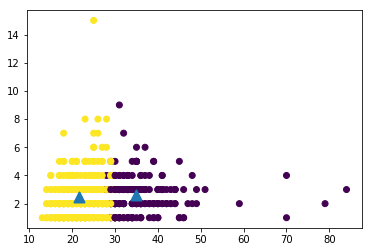

In [289]:
plt.scatter(train.values[:, 0], train.values[:, 1], c=k_class_result, s=100)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
marker='^', s=100, linewidth=2)

### Test dataset

[0 1 1 0 0 1 1 1 0 1 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0
 1 1 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 0 0 0 1 1 1 1 0 0 0 1 0 0 0 1 1 0 0 1
 1 1 0 0 0 0 0 1 0 0 1 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 0 1 0 1 0 1 0 0 0
 0 0 1 0 0 0 0 1 0 1 0 1 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0
 0 1 1 0 1 0 0 1 0 1 1 1 0 0 1 0 0 1 0 0 0 1 0 0 0 0 1 0 0 1 1 1 0 1 0 1 1
 1 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 1 1 0 1 0 1 0 1 0 0 0 0 0 1 0 0 1 0 0 0
 0 1 1 1 0 0 0 1 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 1 1 0 1 0 1]


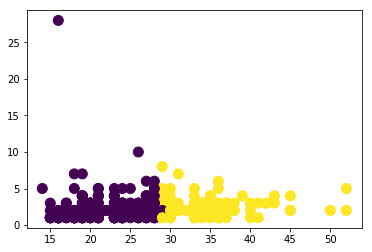

In [299]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(test)
k_class_test_result = kmeans.predict(test)
print(k_class_test_result)
plt.scatter(test.values[:, 0], test.values[:, 1], c=k_class_test_result, s=100)

### Uso de Aglomeracion

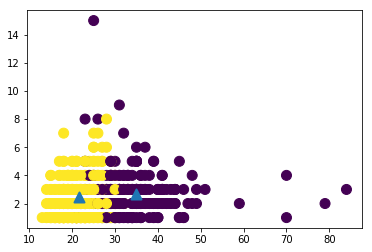

In [301]:
from sklearn.cluster import AgglomerativeClustering
agg = AgglomerativeClustering(n_clusters=2)
agg_class_result = agg.fit_predict(train)
plt.scatter(train.values[:, 0], train.values[:, 1], c=agg_class_result, s=100)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
marker='^', s=100, linewidth=2)

### Test dataset

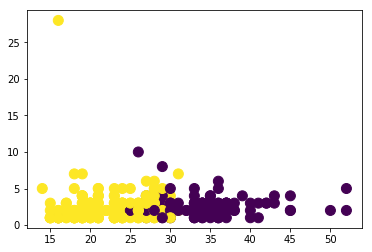

In [302]:
from sklearn.cluster import AgglomerativeClustering
agg = AgglomerativeClustering(n_clusters=2)
agg_class_test_result = agg.fit_predict(test)
plt.scatter(test.values[:, 0], test.values[:, 1], c=agg_class_test_result, s=100)